## Proposed Techniques
- RGB Shift
- CLAHE
- Horizontal Flip
- Vertical Flip
- Gaussian Blur
- Channel Shuffle




## Installing prerequisites

In [1]:
!pip install opencv-python-headless==4.1.2.30
!pip install -U albumentations

     |████████████████████████████████| 21.8 MB 67.4 MB/s 
     |████████████████████████████████| 102 kB 33.5 MB/s 
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


## Importing Libraries

In [2]:
import cv2
import os
import numpy as np
from tqdm import tqdm
import albumentations as A
import matplotlib.pyplot as plt

## Loading the data

In [3]:
tissues_dir = '/content/drive/MyDrive/msrf/train/patched_tissues/images'
masks_dir = '/content/drive/MyDrive/msrf/train/patched_masks/images'

In [4]:
image_list = [f[: -4] for f in os.listdir(tissues_dir)]

x_array = np.zeros((len(image_list), 256, 256, 3), dtype = np.float32)
y_array = np.zeros((len(image_list), 256, 256), dtype = np.float32)

for (i, f) in enumerate(tqdm(image_list, desc = 'Loading Data...')):
  img = cv2.imread(os.path.join(tissues_dir, f + '.png'))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  msk = cv2.imread(os.path.join(masks_dir, f + '.png'), 0)

  x_array[i] = np.array(img, dtype = np.float32)
  y_array[i] = np.array(msk, dtype = np.float32)

print('Data Loaded!!')

Loading Data...: 100%|██████████| 592/592 [02:45<00:00,  3.57it/s]

Data Loaded!!


In [5]:
tissue_iter = iter(x_array)
mask_iter = iter(y_array)

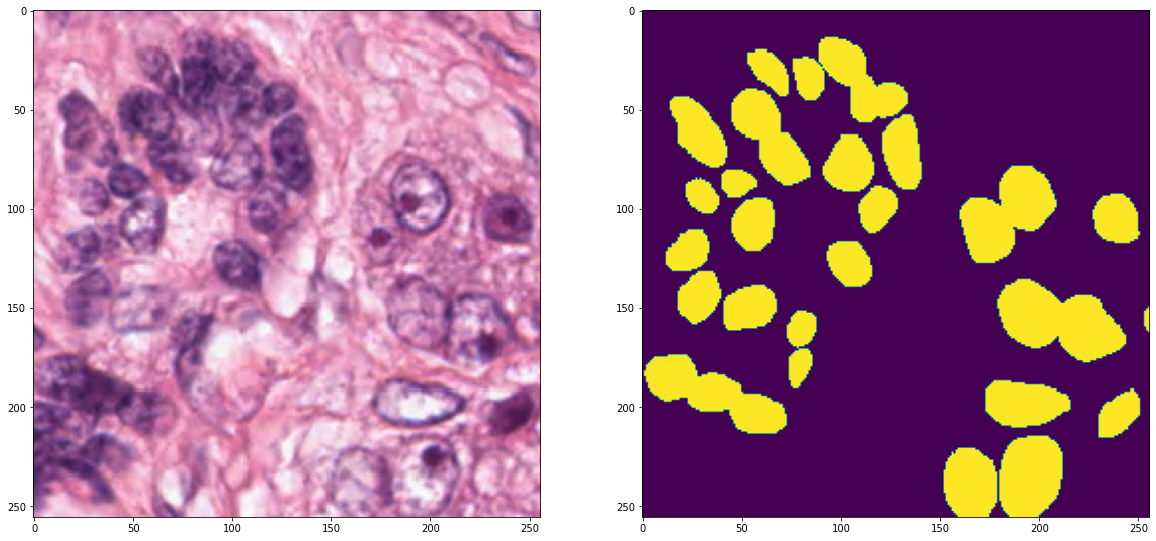

In [6]:
plt.figure(figsize = (20, 50))
plt.subplot(1, 2, 1)
plt.imshow(next(tissue_iter)/255.)
plt.subplot(1, 2, 2)
plt.imshow(next(mask_iter))
plt.show()

In [39]:
test_im = cv2.imread(os.path.join(tissues_dir, os.listdir(tissues_dir)[0]))
test_im = cv2.cvtColor(test_im, cv2.COLOR_BGR2RGB)

In [34]:
cv2.imshow("im", test_im)

DisabledFunctionError: ignored

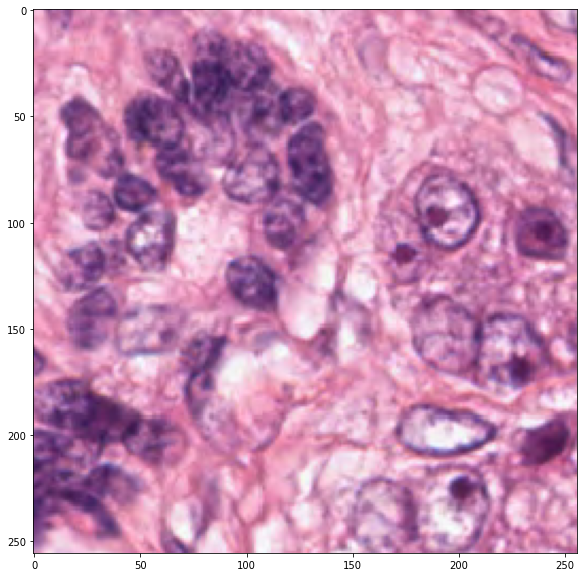

In [8]:
plt.figure(figsize = (10, 10))
plt.imshow(test_im)
plt.show()

In [44]:
Img_gs = cv2.GaussianBlur(test_im,(5,5),cv2.BORDER_DEFAULT)

In [35]:
def cv2np(im):
  im[:, :, 0], im[:, :, 1], im[:, :, 2] = (im[:, :, 2], im[:, :, 1], im[:, :, 0])
  return im

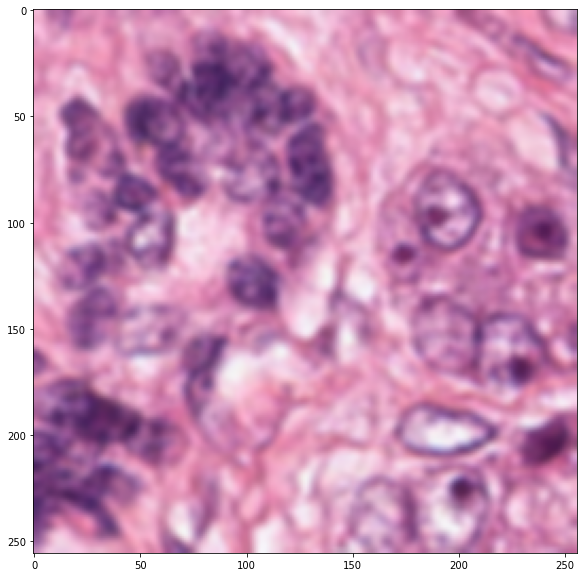

In [45]:
plt.figure(figsize = (10, 10))
plt.imshow(Img_gs)
plt.show()

In [9]:
k = A.RGBShift(p = 1)(image = test_im)

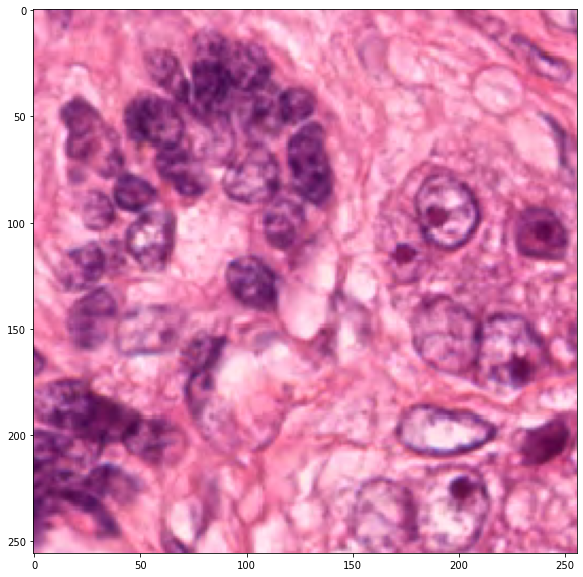

In [10]:
plt.figure(figsize = (10, 10))
plt.imshow(k['image']/255.)
plt.show()

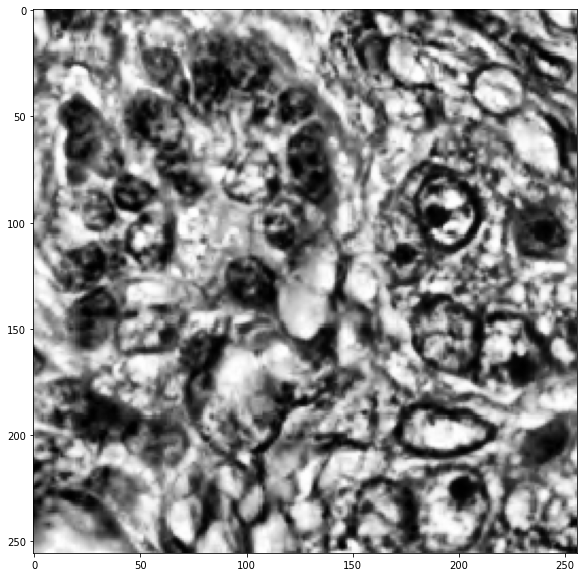

In [54]:
image_bw = cv2.cvtColor(test_im, cv2.COLOR_BGR2GRAY)


clahe = cv2.createCLAHE(clipLimit = 5)
final_img = clahe.apply(image_bw)
bgr = cv2.cvtColor(final_img, cv2.COLOR_GRAY2BGR)


plt.figure(figsize = (10, 10))
plt.imshow(bgr/255.)
plt.show()

In [ ]:
help(A.RandomCrop)

## Augmentations

keep records of indices

### <c><FONT COLOR="YELLOW">CLAHE</c>

### <c><FONT COLOR="YELLOW">RGBShift</c>

### <c><FONT COLOR="YELLOW">Horizontal Flip</c>

### <c><FONT COLOR="YELLOW">Vertical Flip</c>

### <c><FONT COLOR="YELLOW">Gaussian Blur</c>